## Web Scraping + Image Processing

In [24]:
import bs4 as BeautifulSoup
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import requests
import numpy as np

### 1. Scrape an RGB image from a target webpage

In [22]:
# Direct download
img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Carettochelys_insculpta.jpg/200px-Carettochelys_insculpta.jpg"

response = requests.get(img_url)
with open("turtle.jpg", "wb") as file:
    file.write(response.content)

In [19]:
import urllib.request

# Download image
urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Carettochelys_insculpta.jpg/200px-Carettochelys_insculpta.jpg", "turtle.jpg")

# Load with cv2
img = cv2.imread("turtle.jpg")

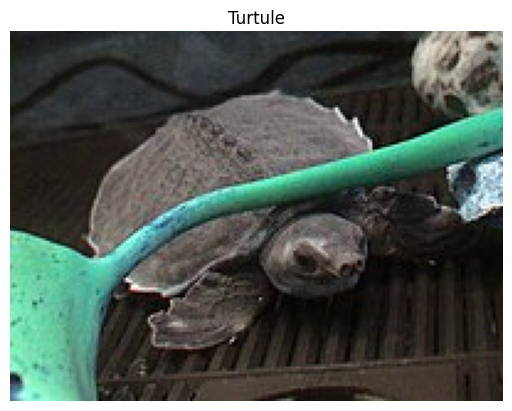

In [20]:
# displaying the image usinfg matplot
plt.imshow(img)
plt.title('Turtule')
plt.axis('off') #hide for cleaner display
plt.show()

### 2. Apply Advanced Histogram Analysis

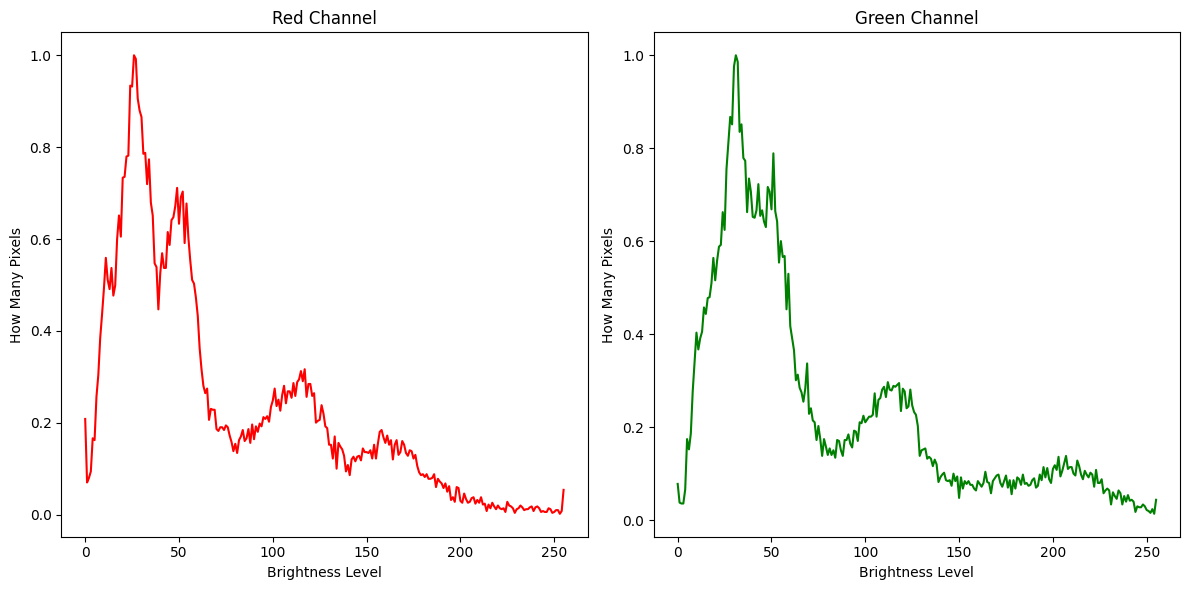

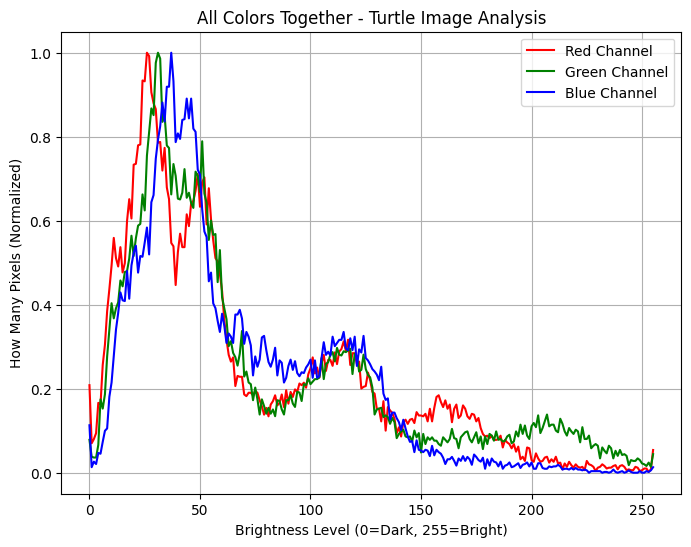

In [21]:
# STEP 1: Load the turtle image
img = cv2.imread('turtle.jpg')  # OpenCV loads in BGR format (Blue-Green-Red)

# STEP 2: Convert BGR to RGB for correct colors
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Now it's Red-Green-Blue

# STEP 3: Split image into separate color channels
red, green, blue = cv2.split(img_rgb)  # Get R, G, B channels separately

# STEP 4: Calculate histogram for each color (count pixels at each intensity)
red_hist = cv2.calcHist([red], [0], None, [256], [0, 256])    # Red histogram
green_hist = cv2.calcHist([green], [0], None, [256], [0, 256])  # Green histogram  
blue_hist = cv2.calcHist([blue], [0], None, [256], [0, 256])   # Blue histogram

# STEP 5: Normalize histograms (make them 0-1 scale for easy comparison)
red_norm = red_hist / red_hist.max()      # Normalize red
green_norm = green_hist / green_hist.max()  # Normalize green
blue_norm = blue_hist / blue_hist.max()    # Normalize blue

# STEP 6: Show individual histograms جنب بعض 
plt.figure(figsize=(12, 6))

# Plot red histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1  ترتيب المكان 
plt.plot(red_norm, color='red') 
plt.title('Red Channel') #title
plt.xlabel('Brightness Level') #x
plt.ylabel('How Many Pixels') #y

# Plot green histogram  
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2 رتيب المكان 
plt.plot(green_norm, color='green')
plt.title('Green Channel') #title 
plt.xlabel('Brightness Level') #x
plt.ylabel('How Many Pixels') #y

plt.tight_layout()  # Make plots fit nicely
plt.show() #show the labels 

# STEP 7: Show all colors together in one graph
plt.figure(figsize=(8, 6))
plt.plot(red_norm, color='red', label='Red Channel') #احمر
plt.plot(green_norm, color='green', label='Green Channel') #اخضر
plt.plot(blue_norm, color='blue', label='Blue Channel')#ازرق
plt.title('All Colors Together - Turtle Image Analysis') #عنوان
plt.xlabel('Brightness Level (0=Dark, 255=Bright)') # x axis label
plt.ylabel('How Many Pixels (Normalized)') # y axis label
plt.legend()  # Show color labels
plt.grid(True)  # Add grid lines
plt.show() # show the label printed out doewn

### 3. Perform Multiple Intensity Transformations

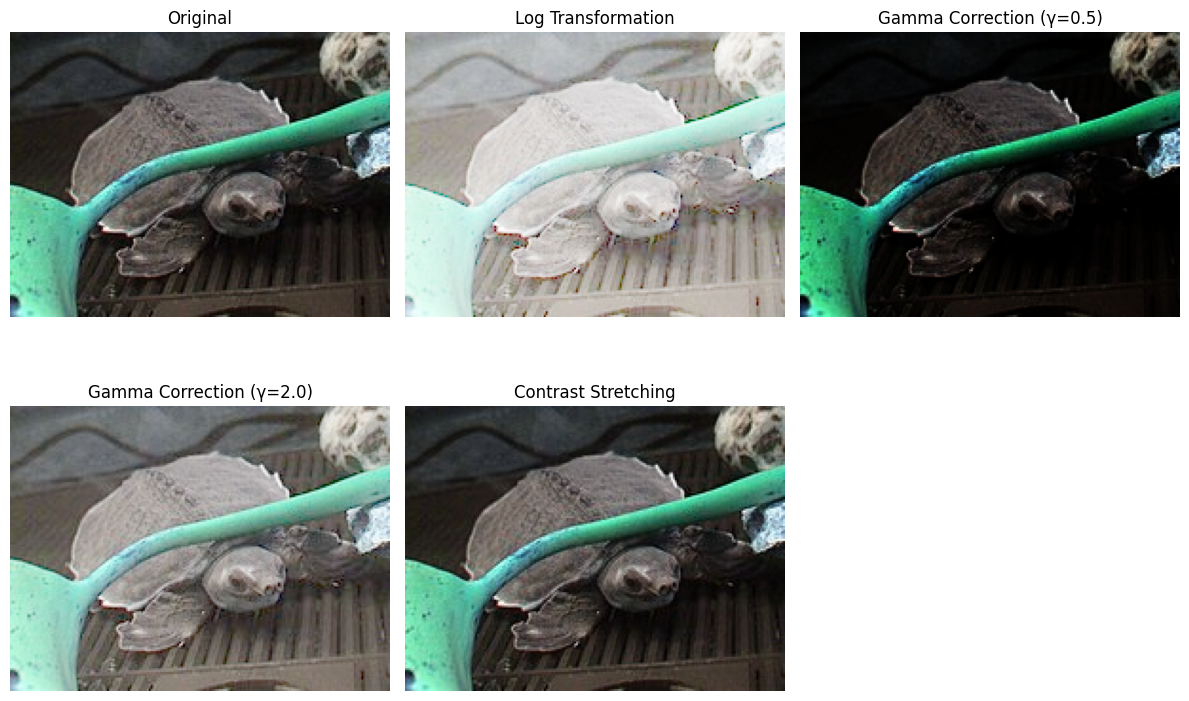

In [25]:
g = cv2.imread('turtle.jpg', cv2.IMREAD_GRAYSCALE) # loead this image

# numiro uno 
# Converting image to float and apply log transform
img_float = img.astype(np.float32)
log_transformed = cv2.normalize(np.log1p(img_float), None, 0, 255, cv2.NORM_MINMAX)
log_transformed = np.uint8(log_transformed)

#dos
#Gamma Correction
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

# Apply with two different gamma values
gamma_low = gamma_correction(img, 0.5)   # Brighter
gamma_high = gamma_correction(img, 2.0)  # Darker

#tres
#constract streching 
# Define min and max
in_min, in_max = np.min(img), np.max(img)

# Contrast stretching
contrast_stretched = ((img - in_min) / (in_max - in_min) * 255).astype('uint8')

#we are done now we display all rwsults togethwer
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gamma_low, cmap='gray')
plt.title('Gamma Correction (γ=0.5)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gamma_high, cmap='gray')
plt.title('Gamma Correction (γ=2.0)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Stretching')
plt.axis('off')

plt.tight_layout()
plt.show()




### 4. Apply Histogram Equalization

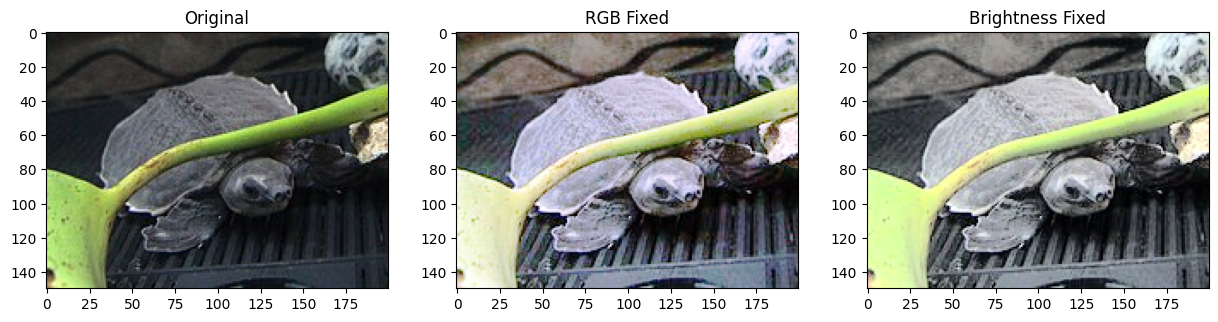

In [35]:
# Load image
img = cv2.imread('turtle.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# METHOD 1: Fix each color separately
red, green, blue = cv2.split(img)

# Make each color better
red_fixed = cv2.equalizeHist(red)
green_fixed = cv2.equalizeHist(green)
blue_fixed = cv2.equalizeHist(blue)

# Put colors back together
rgb_fixed = cv2.merge([red_fixed, green_fixed, blue_fixed])

# METHOD 2: Fix brightness only, keep colors same
# Convert to YCrCb (Y=brightness, Cr=red-ish, Cb=blue-ish)
ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
y, cr, cb = cv2.split(ycrcb)

# Fix only brightness
y_fixed = cv2.equalizeHist(y)

# Put back together
ycrcb_fixed = cv2.merge([y_fixed, cr, cb])
brightness_fixed = cv2.cvtColor(ycrcb_fixed, cv2.COLOR_YCrCb2RGB)

# Show results
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')

# RGB fixed
plt.subplot(1, 3, 2)
plt.imshow(rgb_fixed)
plt.title('RGB Fixed')

# Brightness fixed
plt.subplot(1, 3, 3)
plt.imshow(brightness_fixed)
plt.title('Brightness Fixed')

plt.show()

### 5. Thresholding and Segmentation

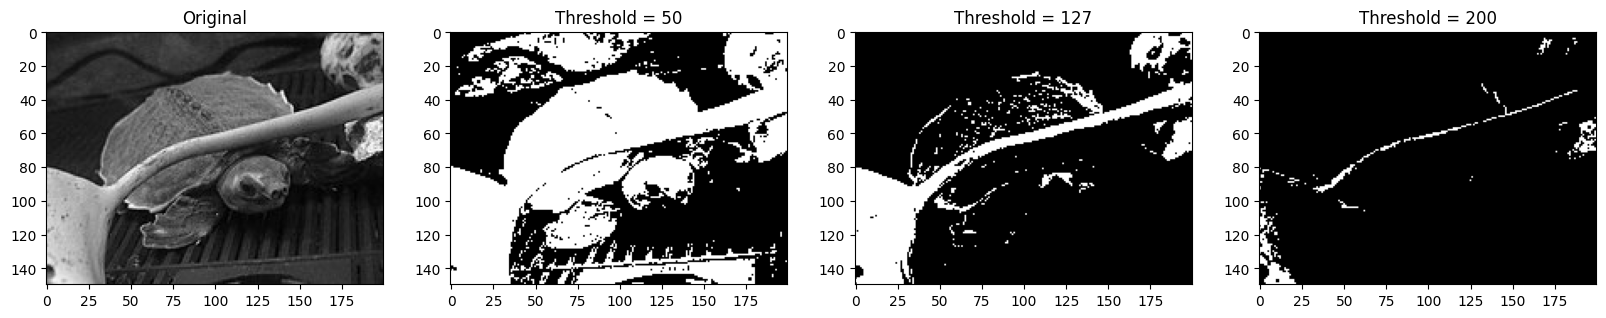

In [36]:
# Load image and make grayscale
img = cv2.imread('turtle.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Custom thresholding function
def my_threshold(input_img, threshold, max_value=255, min_value=0):
   N, M = input_img.shape
   output = np.zeros((N, M), dtype=np.uint8)
   
   # Go through each pixel
   for i in range(N):
       for j in range(M):
           if input_img[i, j] > threshold:
               output[i, j] = max_value  # Make it bright
           else:
               output[i, j] = min_value  # Make it dark
   
   return output

# Try different thresholds
threshold1 = 50
threshold2 = 127
threshold3 = 200

# Apply custom thresholding
result1 = my_threshold(gray, threshold1, max_value=255, min_value=0)
result2 = my_threshold(gray, threshold2, max_value=255, min_value=0)
result3 = my_threshold(gray, threshold3, max_value=255, min_value=0)

# Show results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(result1, cmap='gray')
plt.title(f'Threshold = {threshold1}')

plt.subplot(1, 4, 3)
plt.imshow(result2, cmap='gray')
plt.title(f'Threshold = {threshold2}')

plt.subplot(1, 4, 4)
plt.imshow(result3, cmap='gray')
plt.title(f'Threshold = {threshold3}')

plt.show()

### 6. Visualization Layout

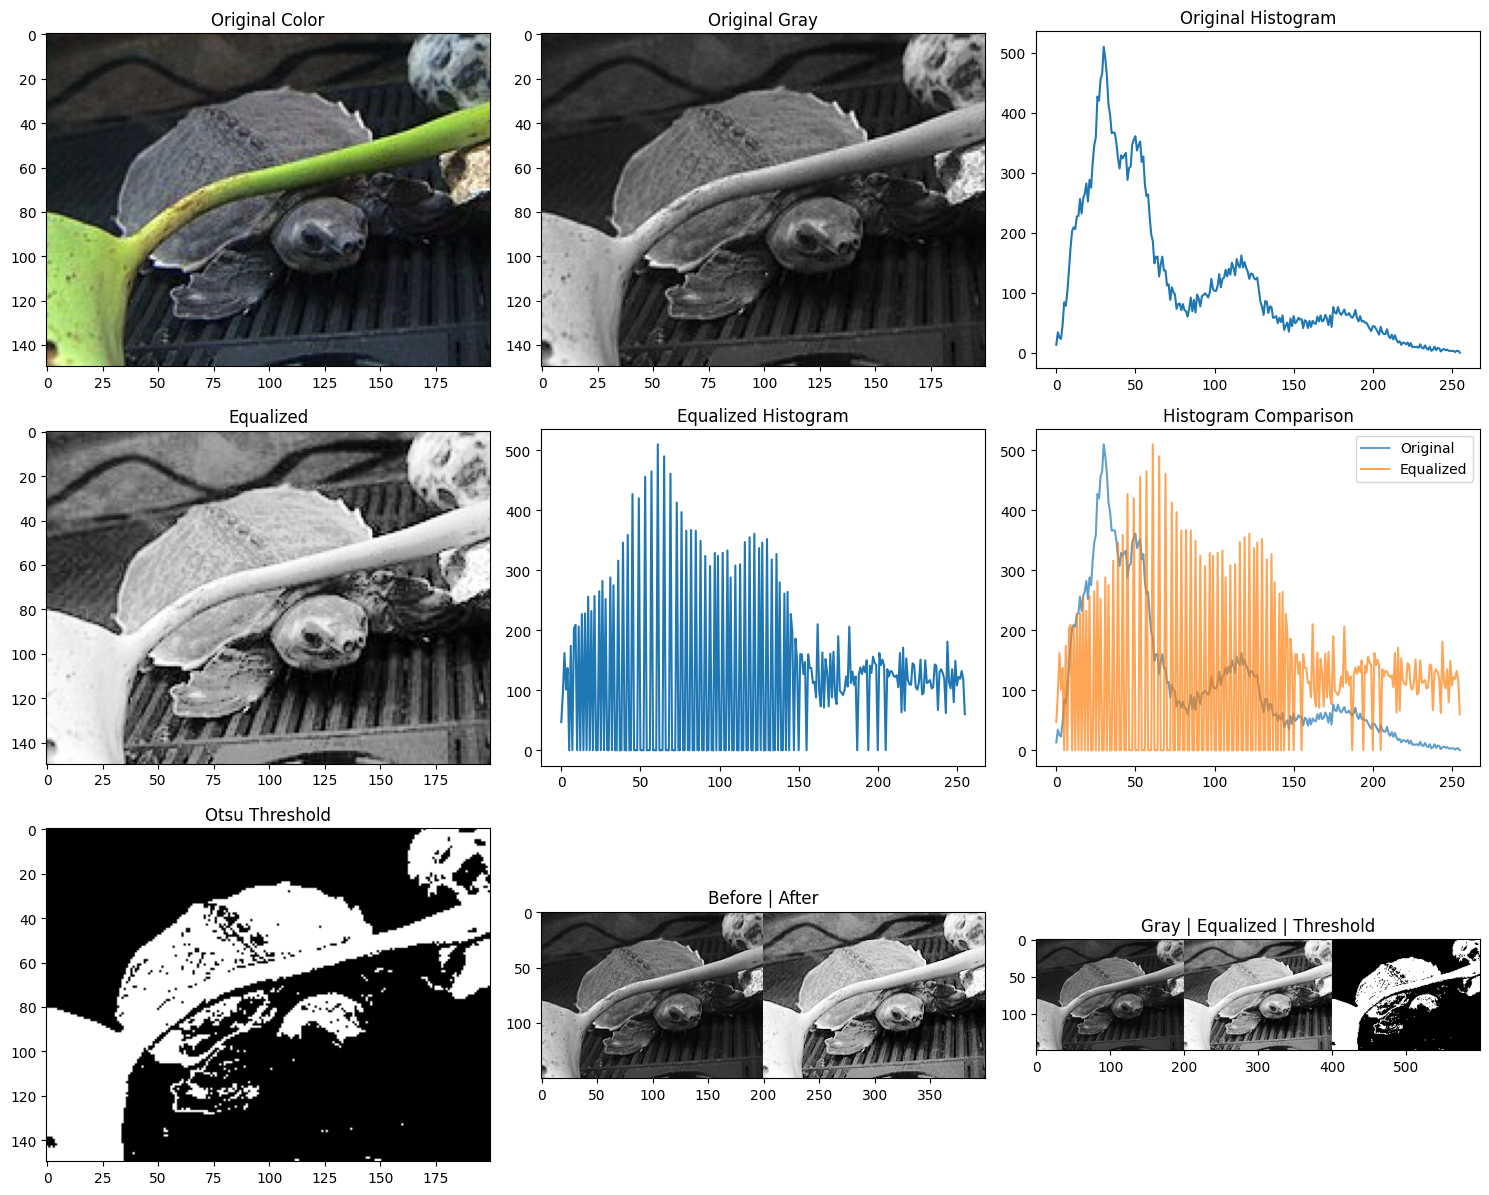

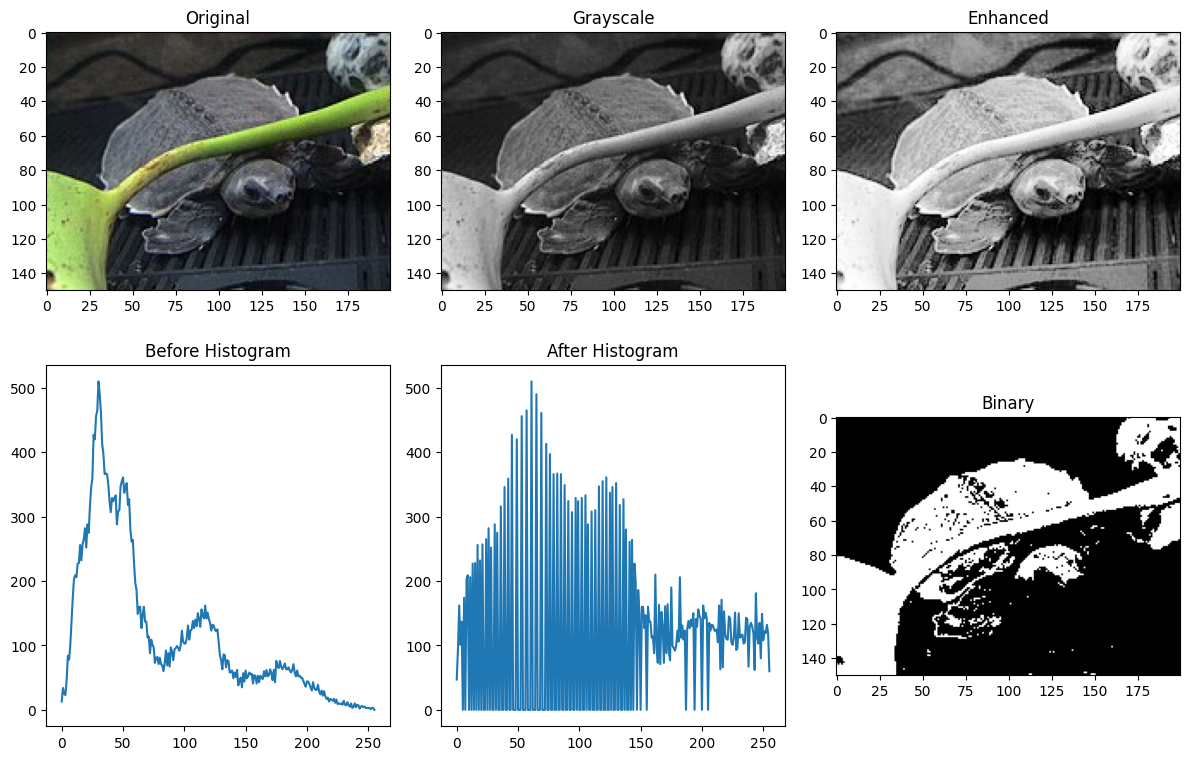

In [37]:
#we are going to basically print all what we did all at once next to each other to comapre the resualt 
# Load image
img = cv2.imread('turtle.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Do some transformations
equalized = cv2.equalizeHist(gray)
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Make histograms
original_hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
equalized_hist = cv2.calcHist([equalized], [0], None, [256], [0, 256])

# BIG COMPARISON LAYOUT
plt.figure(figsize=(15, 12))

# ROW 1: Original images
plt.subplot(3, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Color')

plt.subplot(3, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Original Gray')

plt.subplot(3, 3, 3)
plt.plot(original_hist)
plt.title('Original Histogram')

# ROW 2: Equalized
plt.subplot(3, 3, 4)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized')

plt.subplot(3, 3, 5)
plt.plot(equalized_hist)
plt.title('Equalized Histogram')

plt.subplot(3, 3, 6)
# Compare histograms
plt.plot(original_hist, label='Original', alpha=0.7)
plt.plot(equalized_hist, label='Equalized', alpha=0.7)
plt.title('Histogram Comparison')
plt.legend()

# ROW 3: Thresholding
plt.subplot(3, 3, 7)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Otsu Threshold')

plt.subplot(3, 3, 8)
# Side by side comparison
combined = np.hstack([gray, equalized])
plt.imshow(combined, cmap='gray')
plt.title('Before | After')

plt.subplot(3, 3, 9)
# Show all transformations
plt.imshow(np.hstack([gray, equalized, otsu_thresh]), cmap='gray')
plt.title('Gray | Equalized | Threshold')

plt.tight_layout()
plt.show()

# SIMPLE BEFORE/AFTER LAYOUT
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')

plt.subplot(2, 3, 3)
plt.imshow(equalized, cmap='gray')
plt.title('Enhanced')

plt.subplot(2, 3, 4)
plt.plot(original_hist)
plt.title('Before Histogram')

plt.subplot(2, 3, 5)
plt.plot(equalized_hist)
plt.title('After Histogram')

plt.subplot(2, 3, 6)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Binary')

plt.tight_layout()
plt.show()